### Linear Regression (1/5)

In [ ]:
# Import NumPy library (Numerical Operations)
import numpy as np

# Import matplotlib (Plotting data and model predictions)
import matplotlib.pyplot as plt

# Importing PyTorch library (Perform tensor operations)
import torch

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


Text(0, 0.5, 'y')

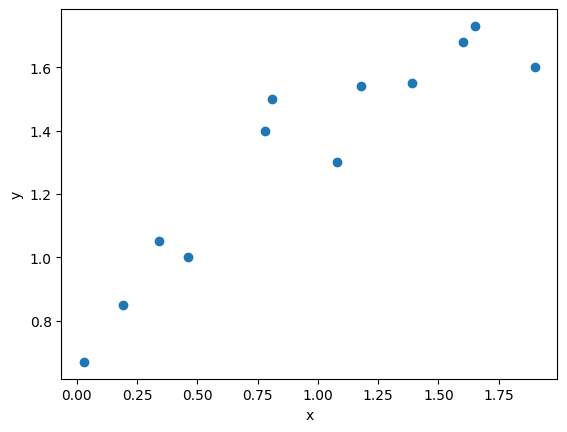

In [70]:
# Create input array (features)
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])

# Create output array (targets/labels)
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

# Print the input and output arrays to visualize the data
print(x)
print(y)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

In [74]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  """
    TODO: Computes the predicted output y for input x using
    a linear regression model with intercept phi0 and slope phi1.
  """
  y = phi0 + phi1 * x  # Linear regression equation

  return y

In [75]:
# Function to help plot the data
def plot(x, y, phi0, phi1, title=None):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'r-',lw=2)

    plt.show()

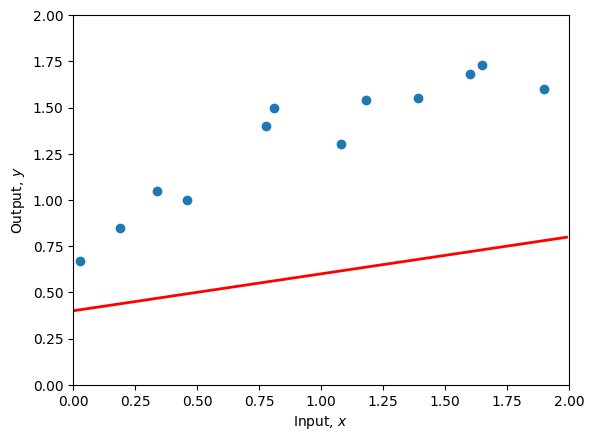

In [76]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [77]:
def compute_loss(x, y, phi0, phi1):
    """
    TODO: Computes the loss as the sum of squared residuals.
    """
    y_pred = f(x, phi0, phi1)           # Model predictions
    residuals = y_pred - y              # Errors between true and predicted
    loss = np.sum(residuals ** 2)       # Sum of squared errors
    return loss

In [78]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


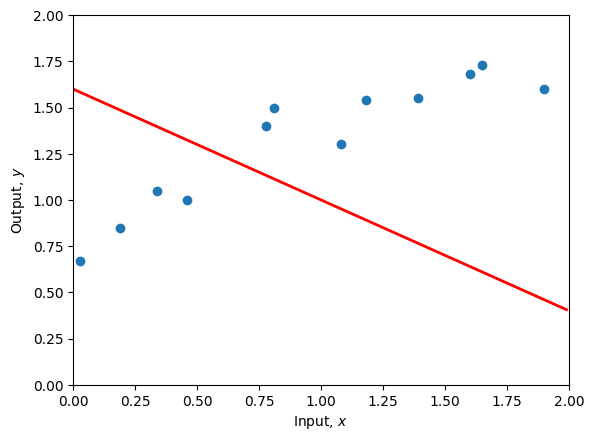

Your Loss = 6.47


In [79]:
"""
TODO: Manual line search: adjust phi0 and phi1 to minimize loss
    Start from a suboptimal point and try to improve it
"""

phi0 = 1.6  # Initial guess for intercept
phi1 = -0.6  # Initial guess for slope

# Plot current fit and show the loss
plot(x, y, phi0, phi1)
print(f'Your Loss = {compute_loss(x, y, phi0, phi1):3.2f}')

### Gradient Descent (2/5)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [81]:
# Function to compute gradient of the loss wrt phi0 (intercept) and phi1 (slope)
def compute_gradient(x, y, phi0, phi1):
    """
    Computes the gradient of sum of squared errors loss wrt parameters phi0 and phi1.

    Gradient formulas derived from
    Loss L = sum_i ((phi0 + phi1*x_i) - y_i)^2
    dL/dphi0 = 2 * sum_i ((phi0 + phi1 * x_i) - y_i)
    dL/dphi1 = 2 * sum_i (x_i * ((phi0 + phi1 * x_i) - y_i))
    """
    y_pred = phi0 + phi1 * x
    residuals = y_pred - y

    dl_dphi0 = 2 * np.sum(residuals)
    dl_dphi1 = 2 * np.sum(residuals * x)

    return dl_dphi0, dl_dphi1


# Example: Compute gradient at a specific parameter set
grad_phi0, grad_phi1 = compute_gradient(x, y, phi0=0.6, phi1=0.52)
print(f"Gradient: dL/dphi0={grad_phi0:.4f}, dL/dphi1={grad_phi1:.4f}")

Gradient: dL/dphi0=-5.4736, dL/dphi1=-5.2230


In [ ]:
def gradient_descent_step(phi0, phi1, x, y, learning_rate):
    """
    TODO: Update phi0 and phi1 by taking a gradient descent step
    """
    grad_phi0, grad_phi1 = compute_gradient(x, y, phi0, phi1)
    new_phi0 = phi0 - learning_rate*grad_phi0
    new_phi1 = phi1 - learning_rate*grad_phi1

    return new_phi0, new_phi1

In [82]:
def gradient_descent_step(phi0, phi1, x, y, learning_rate):
    grad_phi0, grad_phi1 = compute_gradient(x, y, phi0, phi1)
    new_phi0 = phi0 - learning_rate * grad_phi0
    new_phi1 = phi1 - learning_rate * grad_phi1
    return new_phi0, new_phi1

Iter 1: Loss=3.6016, phi0=1.8110, phi1=-0.1191


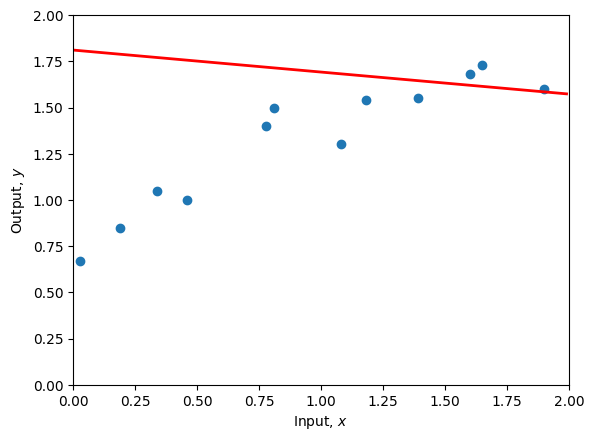

Iter 2: Loss=2.4694, phi0=1.5408, phi1=-0.2158


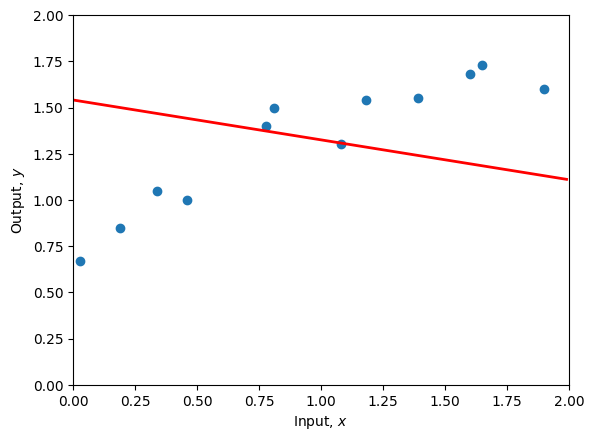

Iter 3: Loss=1.8663, phi0=1.5313, phi1=-0.0404


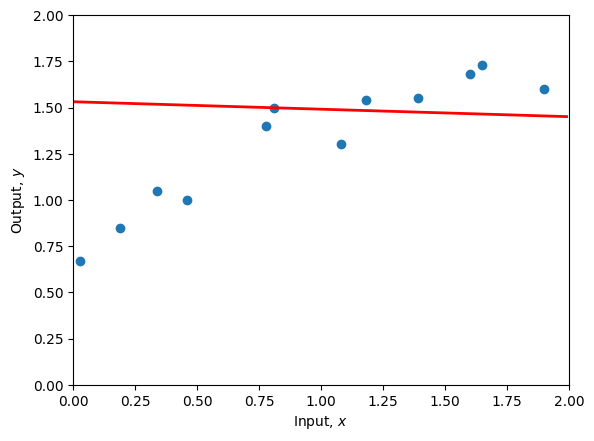

Iter 4: Loss=1.4678, phi0=1.4087, phi1=-0.0165


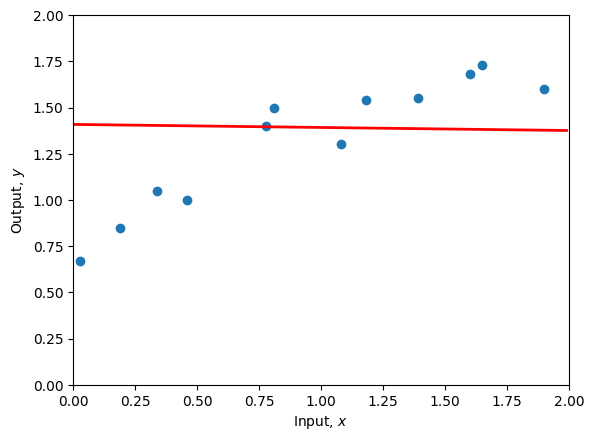

Iter 5: Loss=1.1764, phi0=1.3579, phi1=0.0698


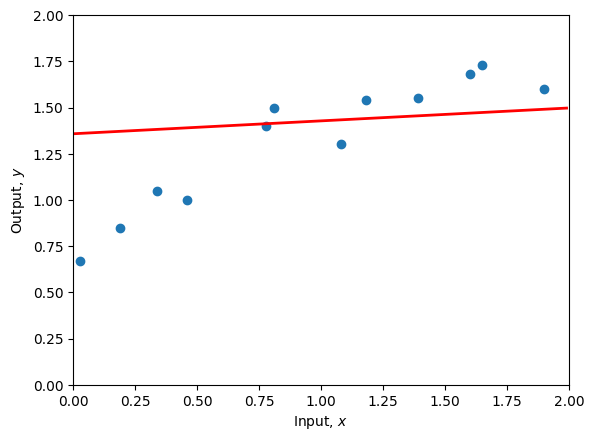

Iter 6: Loss=0.9549, phi0=1.2846, phi1=0.1131


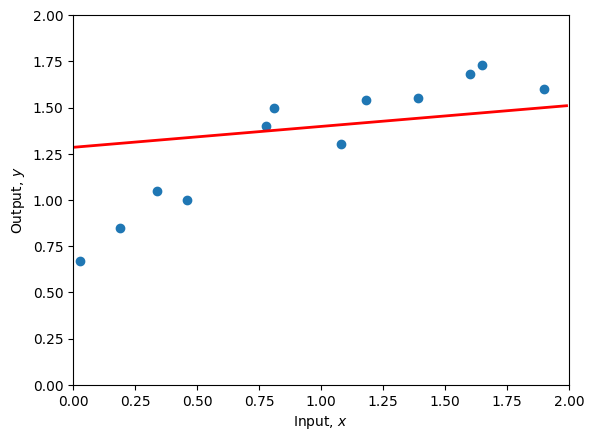

Iter 7: Loss=0.7845, phi0=1.2345, phi1=0.1676


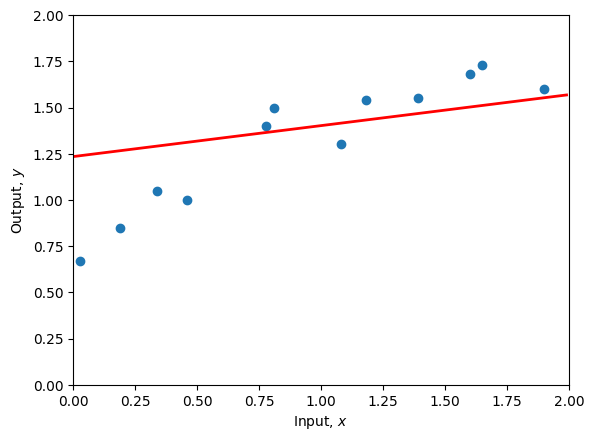

Iter 8: Loss=0.6527, phi0=1.1831, phi1=0.2074


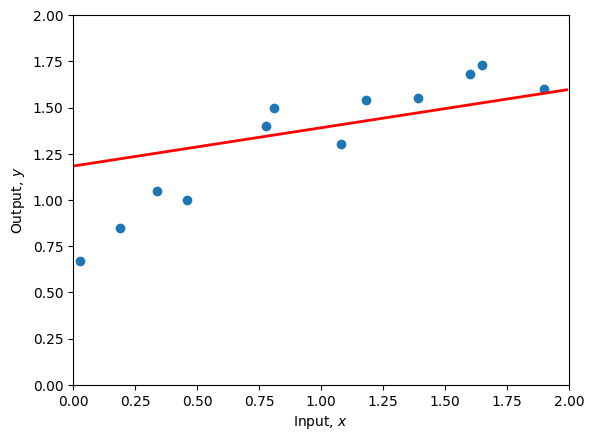

Iter 9: Loss=0.5506, phi0=1.1415, phi1=0.2465


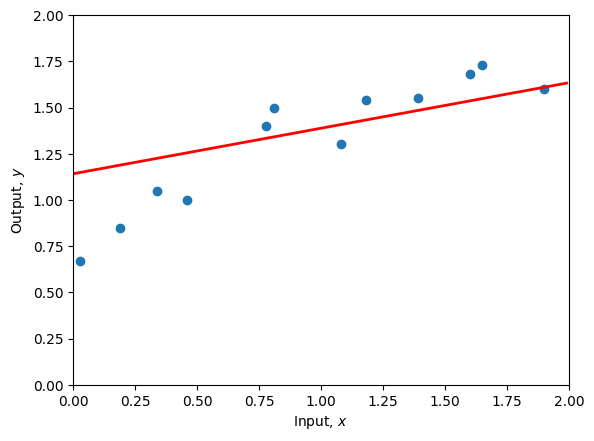

Iter 10: Loss=0.4716, phi0=1.1031, phi1=0.2788


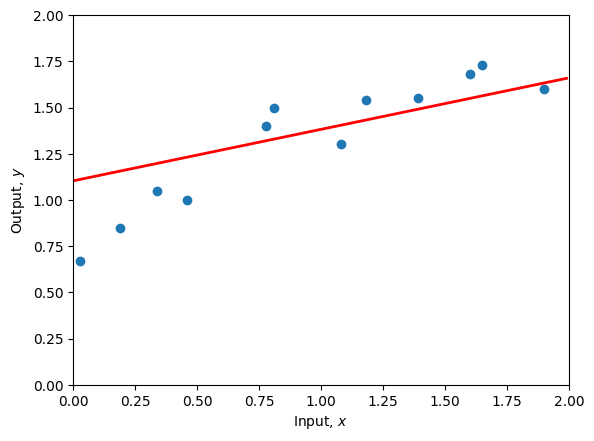

Iter 11: Loss=0.4104, phi0=1.0702, phi1=0.3083


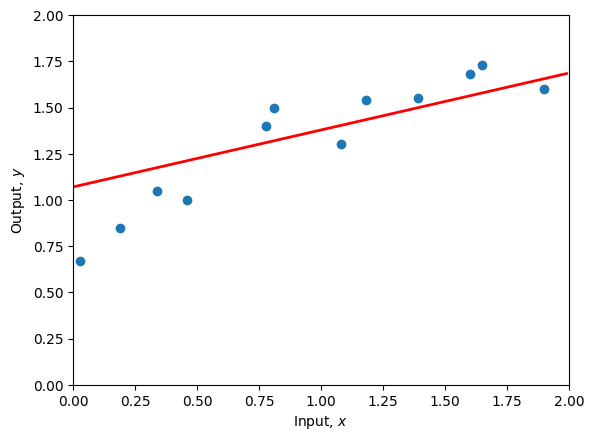

Iter 12: Loss=0.3630, phi0=1.0408, phi1=0.3338


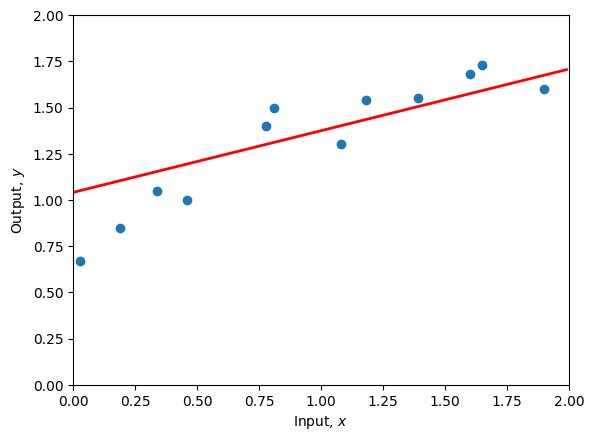

Iter 13: Loss=0.3262, phi0=1.0151, phi1=0.3564


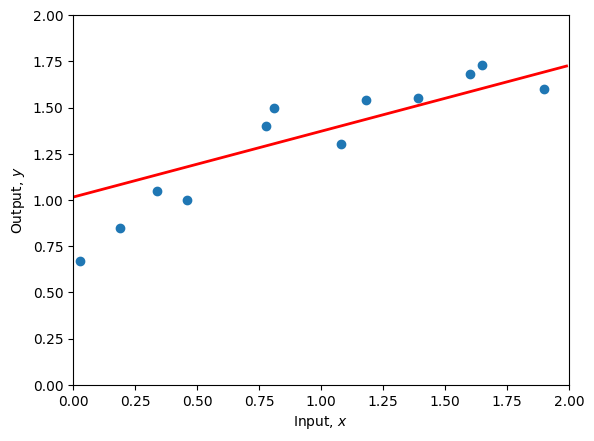

Iter 14: Loss=0.2977, phi0=0.9924, phi1=0.3763


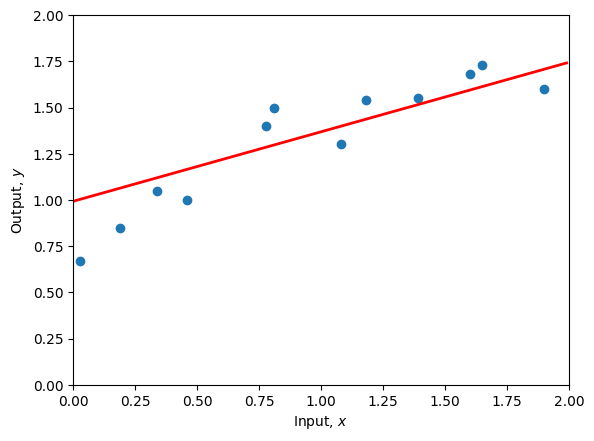

Iter 15: Loss=0.2757, phi0=0.9725, phi1=0.3938


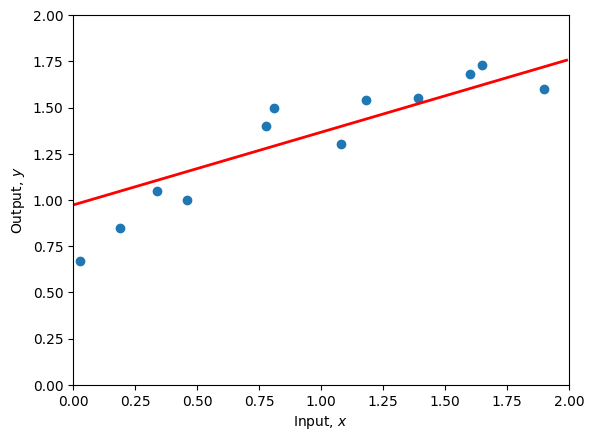

Iter 16: Loss=0.2586, phi0=0.9549, phi1=0.4092


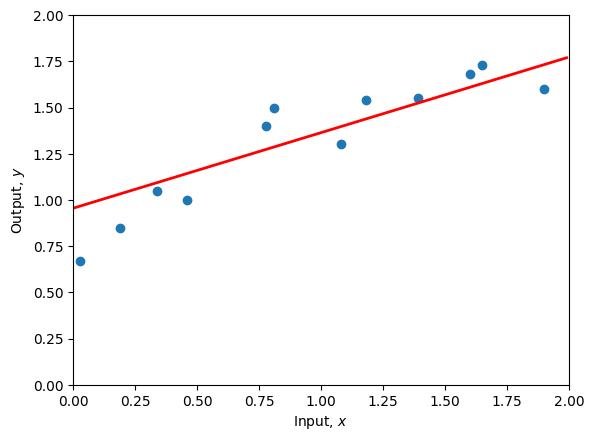

Iter 17: Loss=0.2454, phi0=0.9395, phi1=0.4227


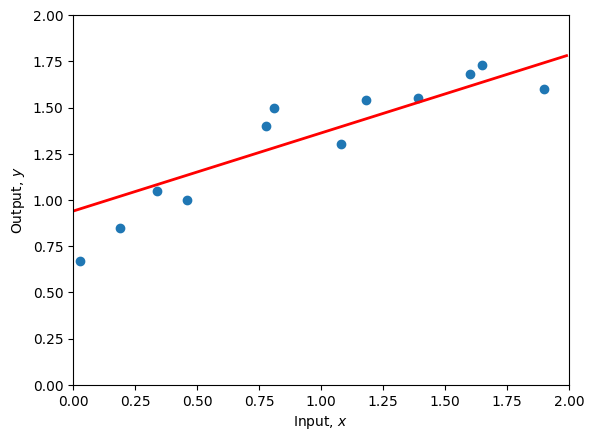

Iter 18: Loss=0.2351, phi0=0.9259, phi1=0.4346


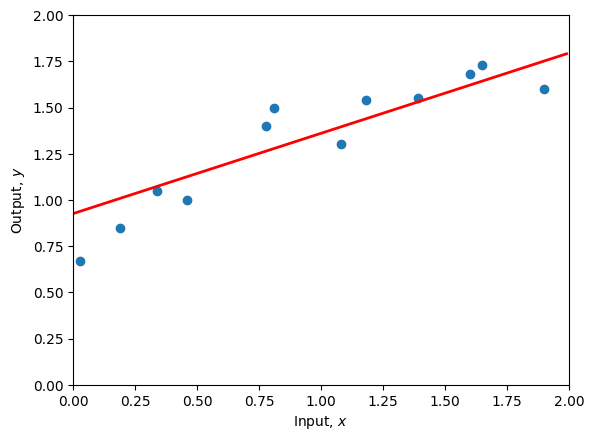

Iter 19: Loss=0.2272, phi0=0.9139, phi1=0.4451


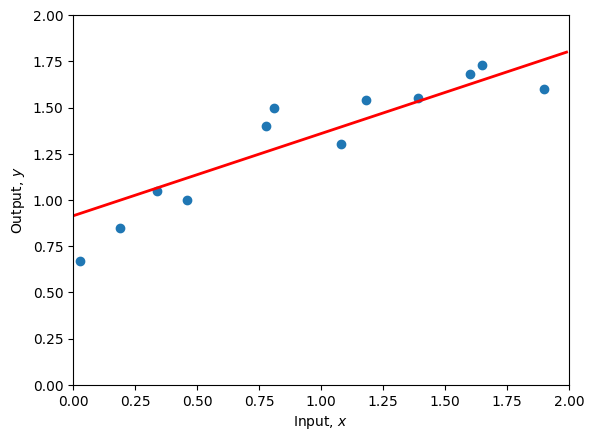

Iter 20: Loss=0.2210, phi0=0.9034, phi1=0.4544


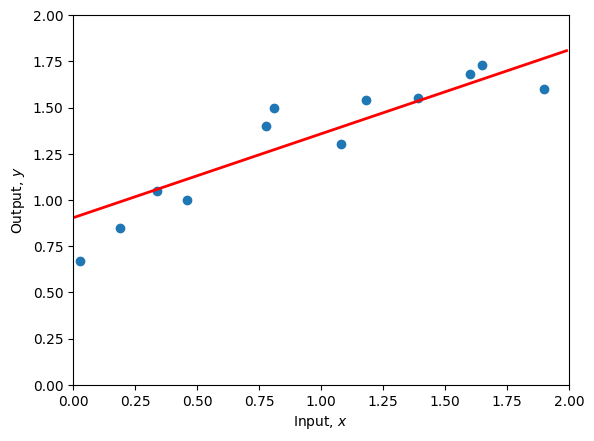

Iter 21: Loss=0.2163, phi0=0.8941, phi1=0.4625


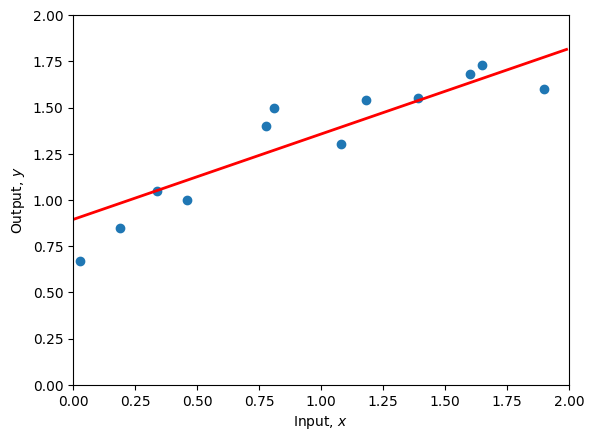

Iter 22: Loss=0.2126, phi0=0.8859, phi1=0.4697


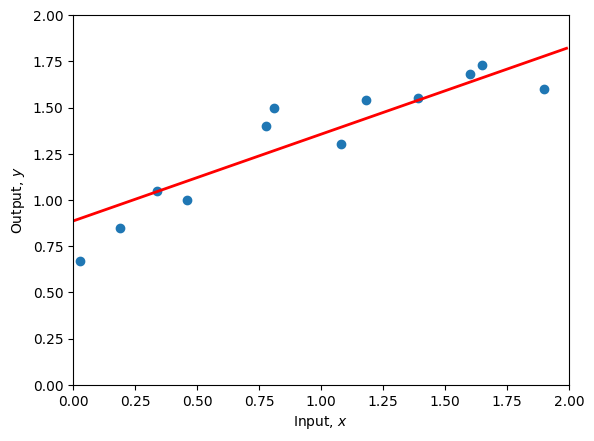

Iter 23: Loss=0.2097, phi0=0.8787, phi1=0.4760


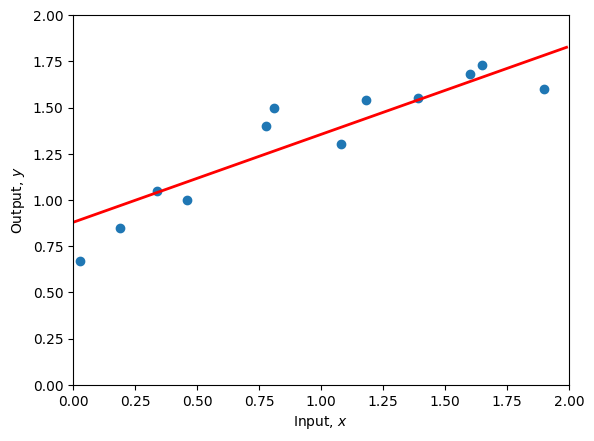

Iter 24: Loss=0.2075, phi0=0.8724, phi1=0.4815


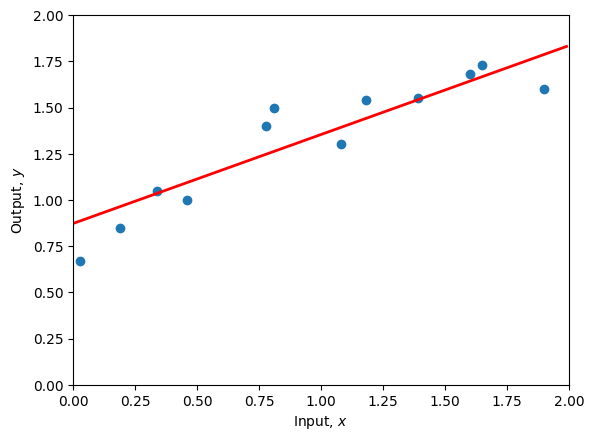

Iter 25: Loss=0.2058, phi0=0.8668, phi1=0.4864


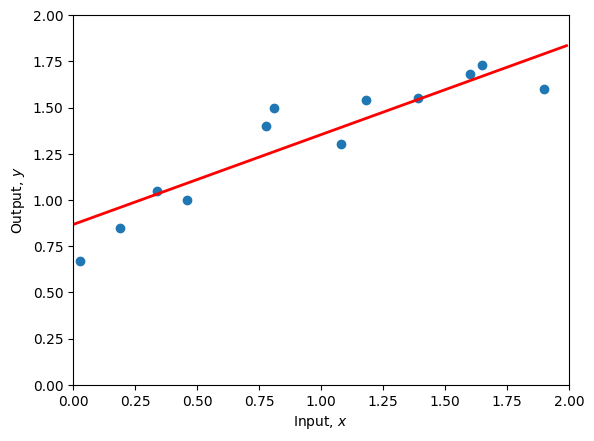

Iter 26: Loss=0.2044, phi0=0.8619, phi1=0.4907


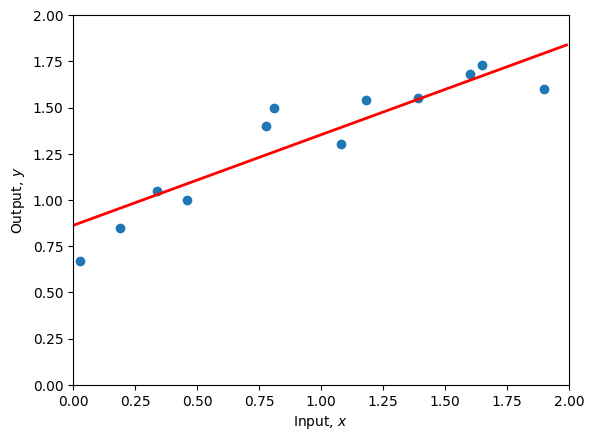

Iter 27: Loss=0.2034, phi0=0.8576, phi1=0.4945


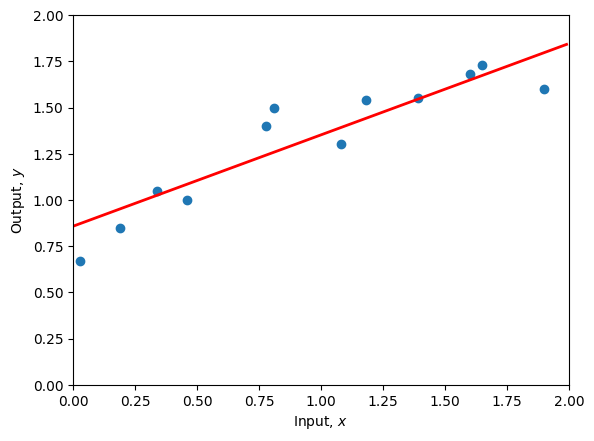

Iter 28: Loss=0.2026, phi0=0.8538, phi1=0.4978


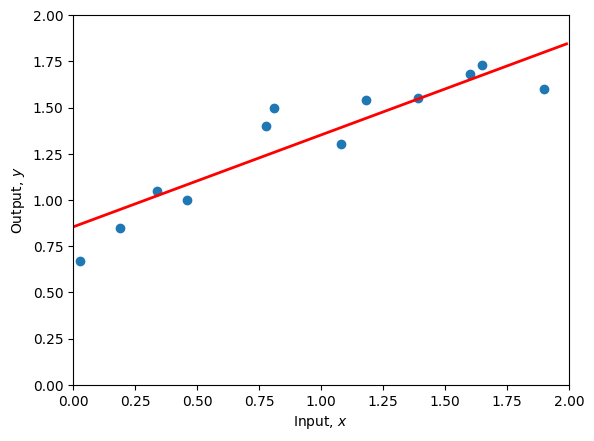

Iter 29: Loss=0.2020, phi0=0.8505, phi1=0.5007


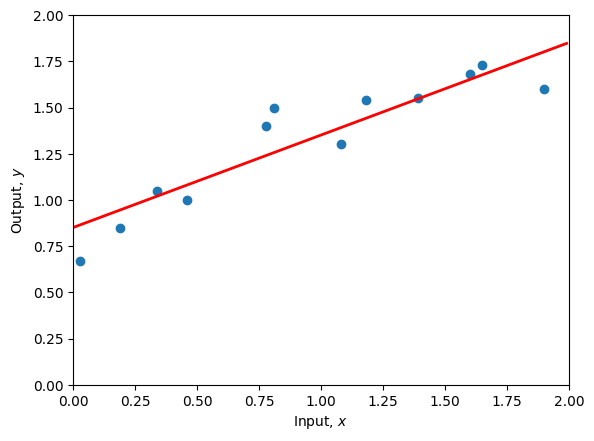

Iter 30: Loss=0.2015, phi0=0.8475, phi1=0.5033


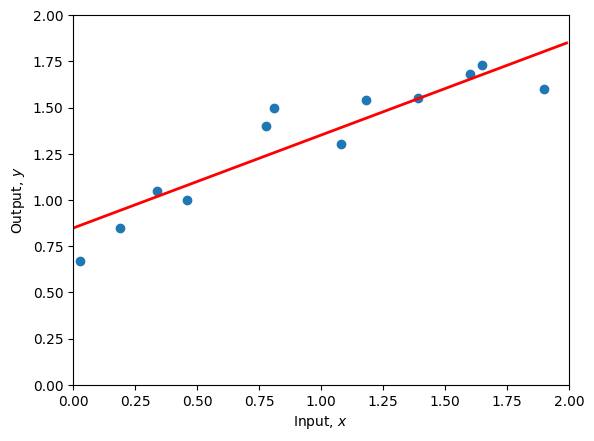

Iter 31: Loss=0.2011, phi0=0.8450, phi1=0.5056


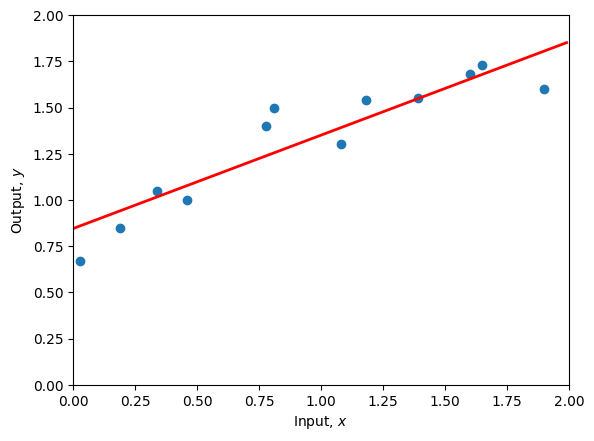

Iter 32: Loss=0.2009, phi0=0.8427, phi1=0.5076


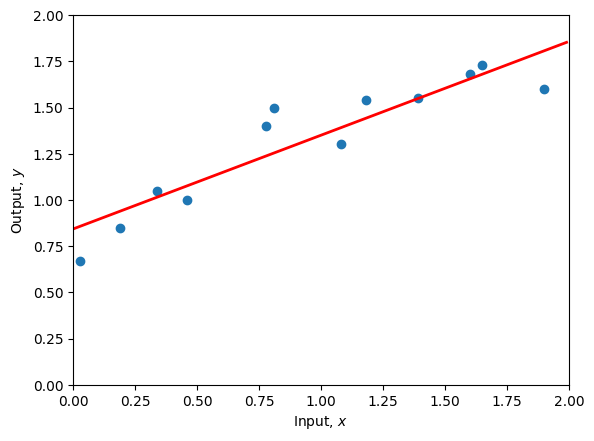

Iter 33: Loss=0.2006, phi0=0.8407, phi1=0.5093


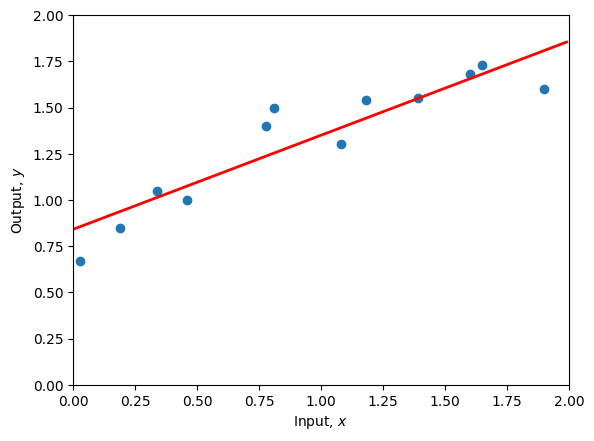

Iter 34: Loss=0.2005, phi0=0.8389, phi1=0.5109


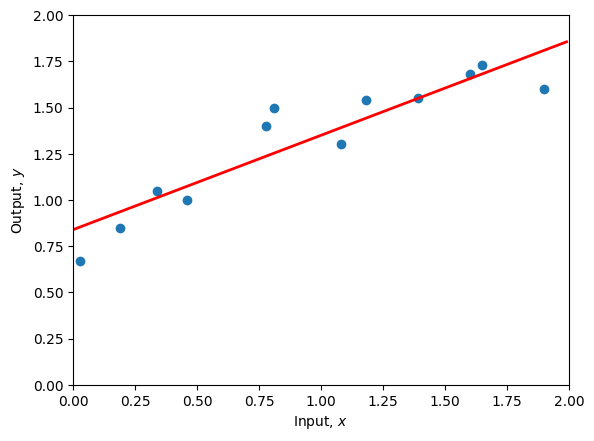

Iter 35: Loss=0.2003, phi0=0.8374, phi1=0.5122


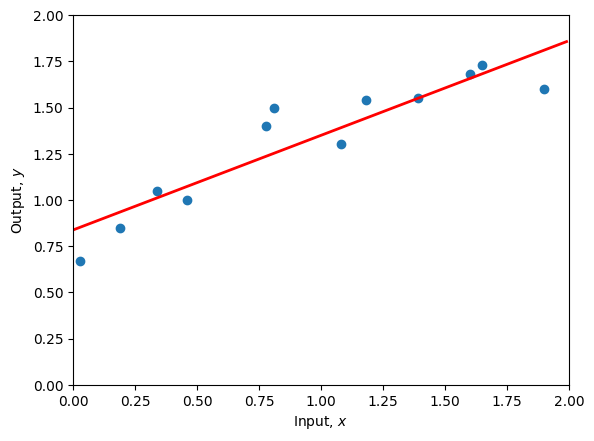

Iter 36: Loss=0.2002, phi0=0.8360, phi1=0.5134


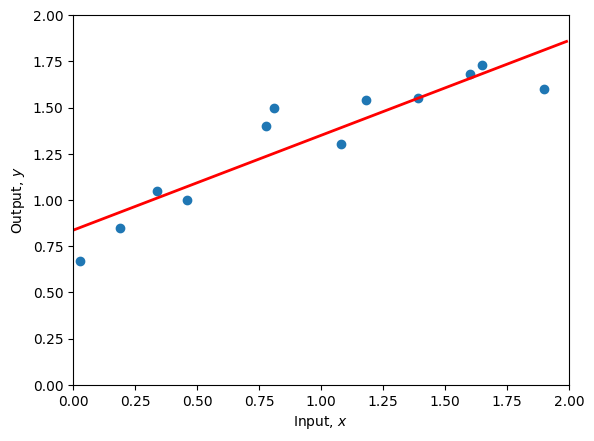

Iter 37: Loss=0.2001, phi0=0.8348, phi1=0.5145


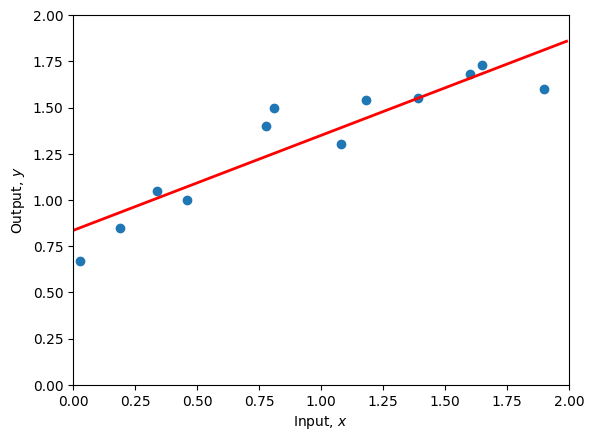

Iter 38: Loss=0.2001, phi0=0.8337, phi1=0.5154


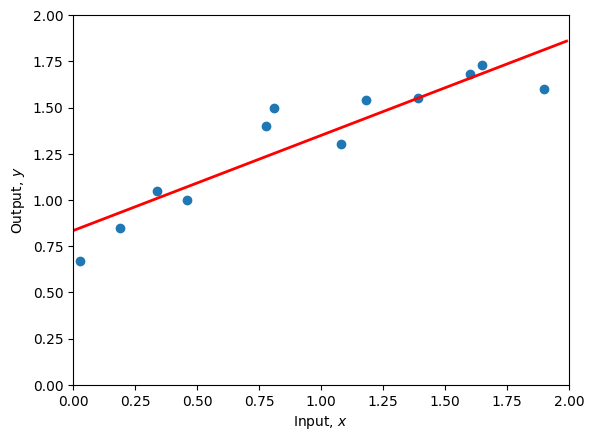

Iter 39: Loss=0.2000, phi0=0.8328, phi1=0.5162


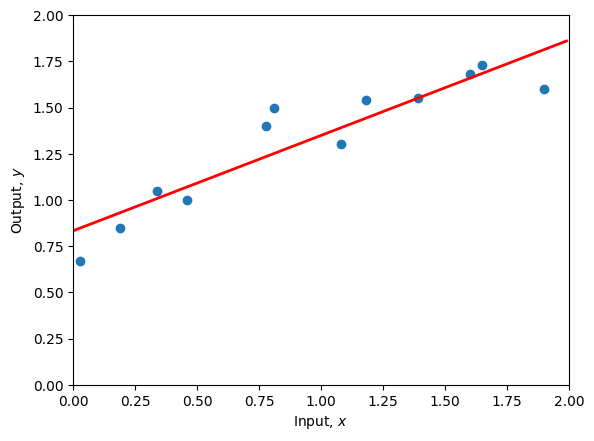

Iter 40: Loss=0.2000, phi0=0.8320, phi1=0.5169


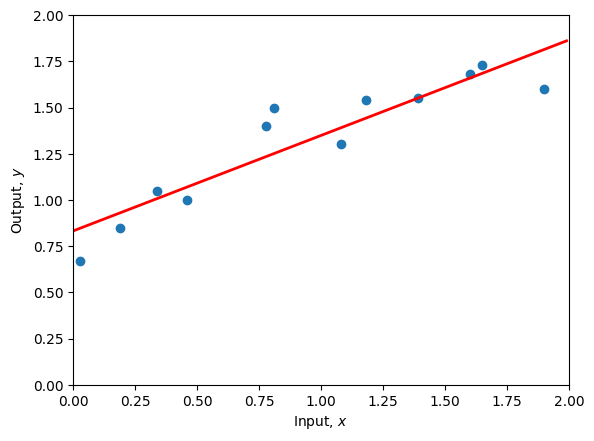

In [83]:
phi0, phi1 = 1.6, -0.6
phi0_history, phi1_history = [phi0], [phi1]

for i in range(40):
    phi0, phi1 = gradient_descent_step(phi0, phi1, x, y, learning_rate=0.03)
    phi0_history.append(phi0)
    phi1_history.append(phi1)
    loss = compute_loss(x, y, phi0, phi1)
    print(f"Iter {i+1}: Loss={loss:.4f}, phi0={phi0:.4f}, phi1={phi1:.4f}")
    plot(x, y, phi0, phi1, f"Iteration {i+1}")

In [84]:
# Section 3: Visualize loss function over a grid of phi0, phi1 values

def plot_loss_surface(x, y, resolution=0.02):
    """Create a grid of phi0 and phi1, compute loss, and plot heatmap and contours."""
    phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0, 2.0, resolution),
                                       np.arange(-1.0, 1.0, resolution))
    all_losses = np.zeros_like(phi0_mesh)

    # Calculate loss for each (phi0, phi1) pair
    for indices, _ in np.ndenumerate(phi0_mesh):
        all_losses[indices] = compute_loss(x, y, phi0_mesh[indices], phi1_mesh[indices])

    fig, ax = plt.subplots(figsize=(7,7))
    contourf = ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels=256)
    ax.contour(phi0_mesh, phi1_mesh, all_losses, levels=40, colors=['#80808080'])
    ax.set_ylim([1, -1])
    ax.set_xlabel(r'Intercept, $\phi_0$')
    ax.set_ylabel(r'Slope, $\phi_1$')
    plt.colorbar(contourf, ax=ax, label='Loss')
    return ax, phi0_mesh, phi1_mesh, all_losses

In [85]:
# Gradient descent with history tracking
def gradient_descent_with_trajectory(x, y, phi0_init, phi1_init, learning_rate=0.01, iterations=100):
    phi0, phi1 = phi0_init, phi1_init

    # Store trajectory history
    trajectory = [(phi0, phi1)]

    for _ in range(iterations):
        y_pred = phi0 + phi1 * x
        error = y - y_pred

        # Compute gradients (partial derivatives of loss w.r.t params)
        grad_phi0 = -2 * np.sum(error)
        grad_phi1 = -2 * np.sum(error * x)

        # Update parameters
        phi0 = phi0 - learning_rate * grad_phi0
        phi1 = phi1 - learning_rate * grad_phi1

        trajectory.append((phi0, phi1))

    return np.array(trajectory)

In [86]:
# Function to visualize loss surface + parameter update trajectory
def optimize_and_plot_trajectory(x, y):
    ax, phi0_mesh, phi1_mesh, all_losses = plot_loss_surface(x, y)

    # Run gradient descent from initial point (0,0)
    trajectory = gradient_descent_with_trajectory(x, y, phi0_init=0.0, phi1_init=0.0, learning_rate=0.01, iterations=100)

    # Plot the trajectory as a line and points on the contour map
    ax.plot(trajectory[:,0], trajectory[:,1], 'r.-', label='Gradient Descent Path')
    ax.legend()
    plt.show()

    final_phi0, final_phi1 = trajectory[-1]
    print(f"Final phi0 (intercept): {final_phi0:.3f}")
    print(f"Final phi1 (slope): {final_phi1:.3f}")

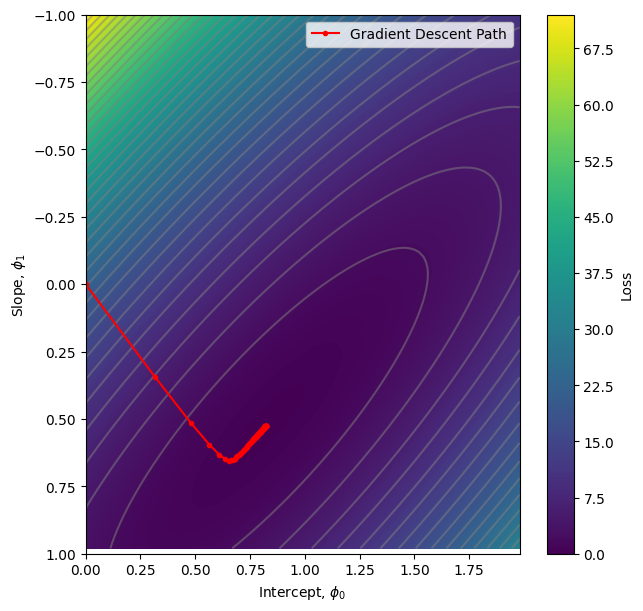

Final phi0 (intercept): 0.822
Final phi1 (slope): 0.525


In [87]:
# Call this function to see trajectory on loss surface
optimize_and_plot_trajectory(x, y)

### Activation functions (3/5)

In [88]:
# Sigmoid activation function
def sigmoid(x):
    """
    Compute sigmoid activation: 1 / (1 + e^(-x))
    Output range: (0,1)
    """
    return 1 / (1 + np.exp(-x))

In [89]:
# ReLU activation function
def relu(x):
    """
    Compute ReLU activation: max(0, x)
    Output range: [0, infinity)
    """
    return np.maximum(0, x)

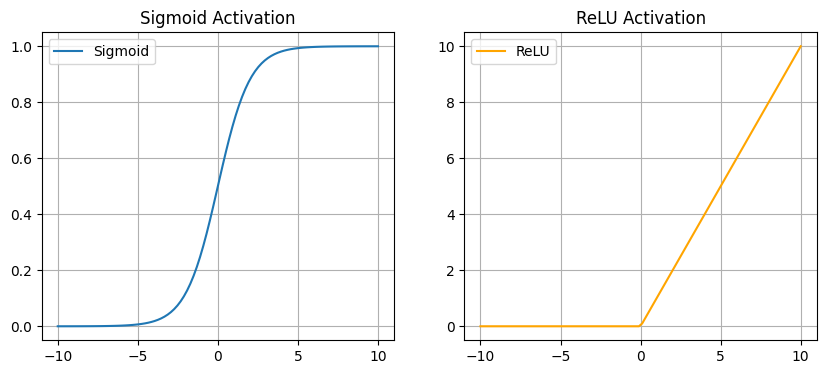

In [90]:
# Test input values
x_values = np.linspace(-10, 10, 100)

# Compute activations
sigmoid_output = sigmoid(x_values)
relu_output = relu(x_values)

# Plot results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_values, sigmoid_output, label='Sigmoid')
plt.title('Sigmoid Activation')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x_values, relu_output, label='ReLU', color='orange')
plt.title('ReLU Activation')
plt.grid(True)
plt.legend()
plt.show()

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Plot function for shallow neural network
# Shows all intermediate values if plot_all=True as in Figure 3.3 from the book
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3,
                w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate stages if requested
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)

    # Plot preactivations of 3 hidden units
    ax[0,0].plot(x, pre_1, 'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x, pre_2, 'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x, pre_3, 'g-'); ax[0,2].set_ylabel('Preactivation')

    # Plot activations of 3 hidden units
    ax[1,0].plot(x, act_1, 'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x, act_2, 'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x, act_3, 'g-'); ax[1,2].set_ylabel('Activation')

    # Plot weighted activations of 3 hidden units (after multiplying by output weights)
    ax[2,0].plot(x, w_act_1, 'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x, w_act_2, 'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x, w_act_3, 'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y, plot_x].set_xlim([0, 1])
        ax[plot_y, plot_x].set_ylim([-1, 1])
        ax[plot_y, plot_x].set_aspect(0.5)
      ax[2, plot_y].set_xlabel('Input, $x$')
    plt.show()

  # Plot final output
  fig, ax = plt.subplots()
  ax.plot(x, y)
  ax.set_xlabel('Input, $x$')
  ax.set_ylabel('Output, $y$')
  ax.set_xlim([0, 1])
  ax.set_ylim([-1, 1])
  ax.set_aspect(0.5)

  # Optionally plot data points on top
  if x_data is not None and y_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i])
  plt.show()


# Define shallow neural network with 1 input, 3 hidden units, 1 output
def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):

  # Compute preactivations for each hidden neuron (linear combination of input)
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Pass preactivations through activation function (ReLU or sigmoid)
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Multiply activations by output layer weights phi_i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Compute final output by summing weighted activations + bias phi_0
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return all intermediate and final values for plotting
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [92]:
# Example parameters for the network with Sigmoid activation
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0 ; theta_21 =  2.0
theta_30 = -0.5 ; theta_31 =  0.65

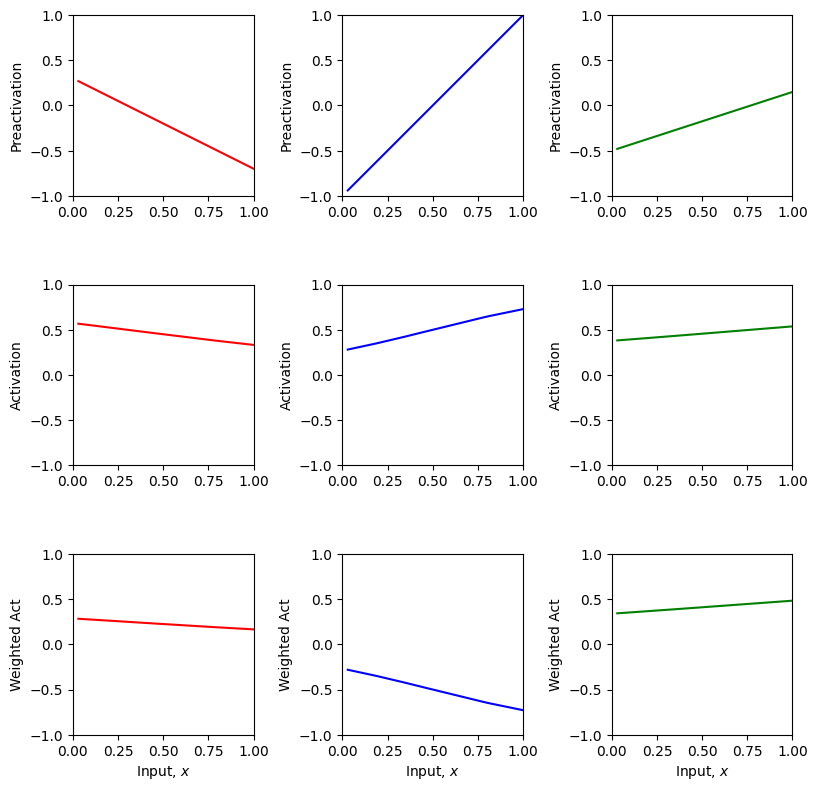

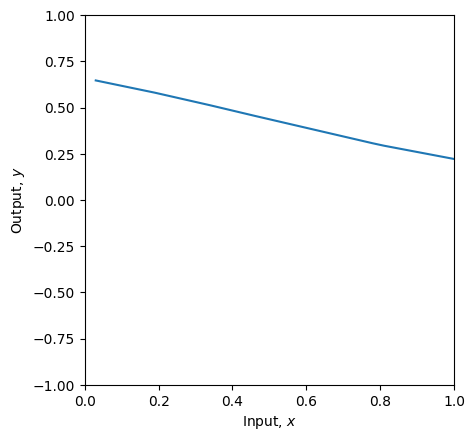

In [93]:
# Example parameters with sigmoid (adjusted for different scale and range)
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Run the network with Sigmoid activations
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_1_1_3(
    x, sigmoid, phi_0, phi_1, phi_2, phi_3,
    theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot with all intermediate stages
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3, plot_all=True)

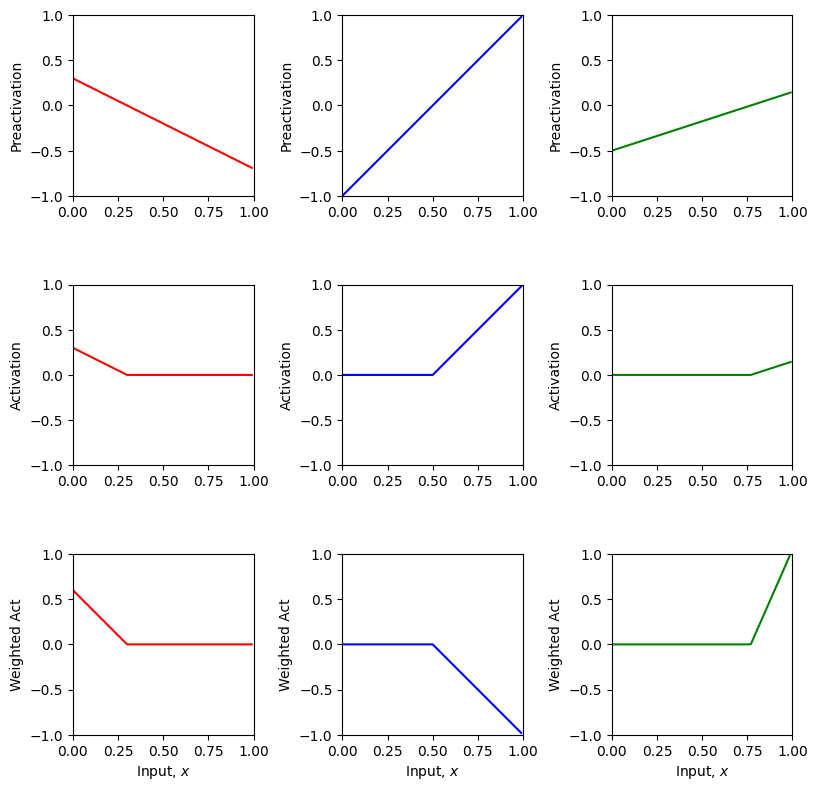

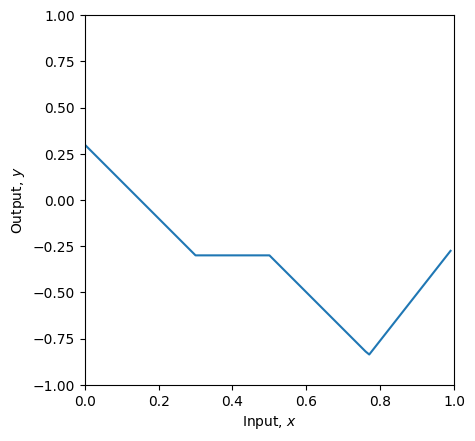

In [94]:
# Now the same with ReLU activation

phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Input range from 0 to 1
x = np.arange(0, 1, 0.01)

# Run the network with ReLU activations
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_1_1_3(
    x, relu, phi_0, phi_1, phi_2, phi_3,
    theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot with all intermediate stages
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3, plot_all=True)

### Back Propagation (4/5)

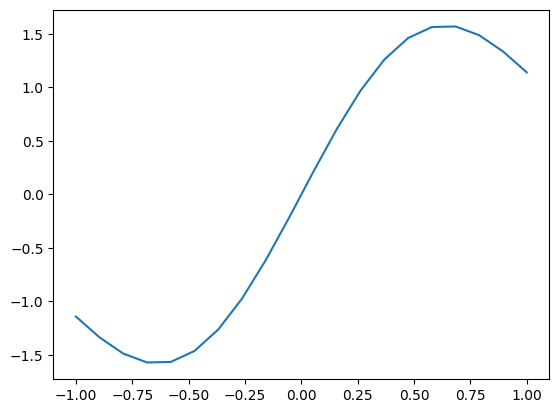

In [95]:
# Small dataset
x = np.linspace(-1, 1, 20).reshape(-1, 1)
y = (np.sin(3 * x) + x).reshape(-1, 1)

plt.plot(x,y)

In [96]:
# Network parameters
np.random.seed(42)
W1 = np.random.randn(1, 3)      # Input to hidden weights
b1 = np.random.randn(1, 3)      # Hidden layer bias
W2 = np.random.randn(3, 1)      # Hidden to output weights
b2 = np.random.randn(1, 1)      # Output bias

In [97]:
def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

In [98]:
def forward(x, w1, b1, w2, b2):
    a1 = x @ w1 + b1
    a2 = sigmoid(a1) @ w2 + b2
    y_hat = a2
    return a1, a2, y_hat

In [100]:
def backward(x, y, y_hat, a1, a2, w1, b1, w2, b2):
    """
    TODO: Write the equations for the backward pass
    """
    # Output layer gradients
    dl_dy_hat = 2 * (y_hat - y) / y.shape[0]  # Derivative of MSE loss wrt y_hat

    # Gradients for w2 and b2
    dl_da2 = dl_dy_hat  # Derivative of y_hat wrt a2 is 1
    dl_dw2 = np.dot(sigmoid(a1).T, dl_da2)  # (3, batch) x (batch, 1) -> (3, 1)
    dl_db2 = np.sum(dl_da2, axis=0, keepdims=True)  # (1, 1)

    # Hidden layer gradients
    da1 = np.dot(dl_da2, w2.T)  # (batch, 1) x (1, 3) -> (batch, 3)
    dZ1 = da1 * sigmoid_deriv(a1)  # (batch, 3)
    dl_dw1 = np.dot(x.T, dZ1)  # (1, batch) x (batch, 3) -> (1, 3)
    dl_db1 = np.sum(dZ1, axis=0, keepdims=True)  # (1, 3)

    return dl_dw1, dl_db1, dl_dw2, dl_db2, np.mean((y_hat - y)**2)

In [101]:
def compute_gradients(x, y, w1, b1, w2, b2):
    a1, a2, y_hat = forward(x, w1, b1, w2, b2)
    loss = np.mean((y_hat - y)**2)
    dl_da2 = 2 * (y_hat - y)

    # Output layer gradients
    dl_dw2 = sigmoid(a1).T @ dl_da2                    # (3, batch) x (batch, 1) -> (3, 1)
    dl_db2 = np.sum(dl_da2, axis=0, keepdims=True)     # (1, 1)

    # Hidden layer gradients
    da1 = dl_da2 @ w2.T                                # (batch, 1) x (1, 3) -> (batch, 3)
    dZ1 = da1 * sigmoid_deriv(a1)                      # (batch, 3)
    dl_dw1 = x.T @ dZ1                                 # (1, batch) x (batch, 3) -> (1, 3)
    dl_db1 = np.sum(dZ1, axis=0, keepdims=True)        # (1, 3)

    return dl_dw1, dl_db1, dl_dw2, dl_db2, loss

Epoch 0: loss=4.8949
Epoch 10: loss=1.1096
Epoch 20: loss=0.2212
Epoch 30: loss=0.0804
Epoch 40: loss=0.0627
Epoch 50: loss=0.0563
Epoch 60: loss=0.0516
Epoch 70: loss=0.0477
Epoch 80: loss=0.0444
Epoch 90: loss=0.0415
Epoch 100: loss=0.0389
Epoch 110: loss=0.0367
Epoch 120: loss=0.0348
Epoch 130: loss=0.0331
Epoch 140: loss=0.0316
Epoch 150: loss=0.0303
Epoch 160: loss=0.0291
Epoch 170: loss=0.0281
Epoch 180: loss=0.0271
Epoch 190: loss=0.0263
Epoch 200: loss=0.0255
Epoch 210: loss=0.0248
Epoch 220: loss=0.0242
Epoch 230: loss=0.0236
Epoch 240: loss=0.0230
Epoch 250: loss=0.0225
Epoch 260: loss=0.0221
Epoch 270: loss=0.0217
Epoch 280: loss=0.0213
Epoch 290: loss=0.0209
Epoch 300: loss=0.0205
Epoch 310: loss=0.0202
Epoch 320: loss=0.0199
Epoch 330: loss=0.0196
Epoch 340: loss=0.0193
Epoch 350: loss=0.0190
Epoch 360: loss=0.0187
Epoch 370: loss=0.0185
Epoch 380: loss=0.0182
Epoch 390: loss=0.0180
Epoch 400: loss=0.0178
Epoch 410: loss=0.0175
Epoch 420: loss=0.0173
Epoch 430: loss=0.0171

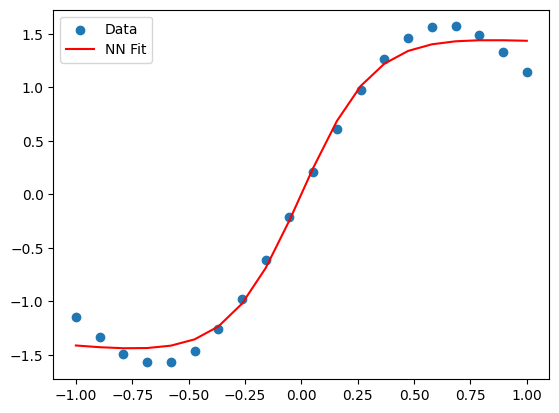

In [102]:
lr = 0.03
n_epochs = 500

W1, b1 = np.random.randn(1, 3), np.random.randn(1, 3)
W2, b2 = np.random.randn(3, 1), np.random.randn(1, 1)
losses = []

for epoch in range(n_epochs):
    dl_dw1, dl_db1, dl_dw2, dl_db2, loss = compute_gradients(x, y, W1, b1, W2, b2)

    # Update parameters using computed gradients
    W1 -= lr * dl_dw1
    b1 -= lr * dl_db1
    W2 -= lr * dl_dw2
    b2 -= lr * dl_db2
    losses.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss={loss:.4f}")

# Plot final fit
plt.scatter(x, y, label="Data")
_, _, y_pred = forward(x, W1, b1, W2, b2)
plt.plot(x, y_pred, 'r-', label="NN Fit")
plt.legend()
plt.show()

### Linear Regression Example (5/5)

In [103]:
# We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at
# the average temperature, rainfall, and humidity (input variables or features) in a region.
# Input data is shown in the Image 3

# In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :
# Three parameters that affects the production of Apples and Oranges are Temp.(F), Rainfall(mm), and Humidity(%)

# yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1 (Bias - Adjustment Fector)
# yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2 (Bias - Adjustment Fector)

# Sometimes a combination of weight and bias is also known as weight.
# Our goal is to find a good value of weights through which we can estimate right yield of Apples and Oranges

import numpy as np
import torch

# Input (temp., rainfall, humidity)
# The reason to use "NumPy" is to meet the real world scenario that we are getting a data in a csv file and we are creating a NumPy array out of that data.
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype = 'float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

inputs = torch.from_numpy(inputs)                    # Converting a NumPy array "inputs" into a Tensor
targets = torch.from_numpy(targets)                  # Converting a NumPy array "targets" into a Tensor
print("--- Initial Data ---")
print("Inputs (temp, rainfall, humidity):")
print(inputs)
print("\nTargets (apples, oranges):")
print(targets)

### Linear Regression

# In our case, we have total 2 equations each having 3 weights and that will create a matrix of 2*3 for weights
# we also have two biases, one in each equation and that will create a column vector (Image 4)

# Weights and Biases
w = torch.randn(2, 3, requires_grad=True)            # Creating a 2*3 matrix for weights
b = torch.randn(2, requires_grad=True)               # Creating a 2*1 matrix for Biases
print("\n--- Initial Parameters ---")
print("Initial Weights (w):")
print(w)
print("\nInitial Biases (b):")
print(b)

def model(x):
    # @ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor
    return x @ w.t() + b

# Let's see the initial predictions before training
initial_preds = model(inputs)
print("\n--- Before Training ---")
print("Initial predictions:")
print(initial_preds)

# Printing the "targets" variable to compare the predicted data with the actual traget values
print("\nActual targets:")
print(targets)

### Function for the Loss Function (Mean Square Error)
# Step 1: Take the difference between the predicted value and the actual value
# Step 2: Square all the elements of the difference matrix to remove the negative sign
# Step 3: Calculate the average

def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

# Computing the Loss using MSE function
loss = mse(initial_preds, targets)
# The output of the Loss function means that each prediction differs from the square root of the resulting loss
print(f"\nInitial Loss: {loss.item():.4f}")


### Computing the Gradients and Training the Model

print("\n--- Training Process ---")
# Train for 100 iterations
for i in range(500):
    # 1. Generate predictions using the current weights and biases
    preds = model(inputs)

    # 2. Calculate the loss
    loss = mse(preds, targets)

    # 3. Compute gradients with respect to weights and biases (THE CRITICAL STEP!)
    loss.backward()

    # 4. Adjust weights & biases to reduce the loss. We use torch.no_grad()
    #    to tell PyTorch not to track these operations for the next gradient calculation.
    learning_rate = 1e-4
    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate

        # 5. Reset the gradients to zero. This is important because PyTorch accumulates
        #    gradients, and we want to start fresh for the next iteration.
        w.grad.zero_()
        b.grad.zero_()

    # Print the loss every 50 epochs to see if it's going down
    if (i+1) % 50 == 0:
        print(f'Epoch [{i+1}/500], Loss: {loss.item():.4f}')


### Final Results

print("\n--- After Training ---")
# Let's verify that the loss is actually lower by making final predictions
final_preds = model(inputs)
final_loss = mse(final_preds, targets)

print("Final Predictions:")
print(final_preds)
print("\nActual Targets:")
print(targets)
print(f'\nFinal Loss: {final_loss.item():.4f}')

--- Initial Data ---
Inputs (temp, rainfall, humidity):
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Targets (apples, oranges):
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

--- Initial Parameters ---
Initial Weights (w):
tensor([[ 1.0143, -0.5664, -3.7228],
        [ 0.1171,  0.6110, -1.2030]], requires_grad=True)

Initial Biases (b):
tensor([0.5330, 0.7540], requires_grad=True)

--- Before Training ---
Initial predictions:
tensor([[-123.4540,   -1.4856],
        [-195.2702,  -11.8084],
        [-203.0474,   23.0484],
        [ -58.1075,   -5.5360],
        [-244.4533,  -16.7147]], grad_fn=<AddBackward0>)

Actual targets:
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

Initial Loss: 38953.7578

--- Training Process ---
Epoch [50/500], Loss: 343.1361
Epoch [100/5

### Finished: